# Import and analyze apartments data from the canton of Zuerich

## Libararies and Settings

In [1]:
# Libraries
import os
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

# Content of current working directory
fnmatch.filter(os.listdir('.'), '*.csv')

/Users/sivanujanselvarajah/Documents/zhaw/4.Semester/Scientific programming/scientific_programming/Week_03/exercises/Docker_Jupyter_Datascience_Notebook


['apartments_data_prepared.csv']

## Read data

In [2]:
df_orig = pd.read_csv('apartments_data_prepared.csv', sep =',')

# Remove missing values
df = df_orig.dropna().reset_index(drop = False)
df.head(5)

,index,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw,rooms,area,price
0,0,1662023695-433,https://www.immoscout24.ch/de/wohnung/mieten/k...,"3,5 Zimmer, 122 m², CHF 3180.—","Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",CHF 3180.—,"«Grosse Galerie, Terrasse mit Pergola, Berg- u...","3,5 Zimmer, 122 m², CHF 3180.—Sunnenbergstrass...",3.5,122.0,3180.0
1,1,1662023745-820,https://www.immoscout24.ch/de/wohnung/mieten/k...,"2,5 Zimmer, 78 m², CHF 3760.—","Lavaterstr. 63, 8002 Zürich, ZH",CHF 3760.—,«Wunderschöne Wohnung im Enge-Quartier»,"2,5 Zimmer, 78 m², CHF 3760.—Lavaterstr. 63, 8...",2.5,78.0,3760.0
2,2,1662023742-807,https://www.immoscout24.ch/de/wohnung/mieten/k...,"5,5 Zimmer, 115 m², CHF 2860.—","Langfurrenstrasse 5c, 8623 Wetzikon ZH, ZH",CHF 2860.—,«Wohnmomente zum Festhalten»,"5,5 Zimmer, 115 m², CHF 2860.—Langfurrenstrass...",5.5,115.0,2860.0
3,3,1662023804-1290,https://www.immoscout24.ch/de/wohnung/mieten/k...,"3,5 Zimmer, 74 m², CHF 2165.—","Sandbuckweg 5A, 8157 Dielsdorf, ZH",CHF 2165.—,"«3,5 pièces, 74 m²»","top3,5 Zimmer, 74 m², CHF 2165.—Sandbuckweg 5A...",3.5,74.0,2165.0
4,4,1662023739-771,https://www.immoscout24.ch/de/wohnung/mieten/k...,"5,5 Zimmer, 195 m², CHF 6900.—","Parkring 59, 8002 Zürich, ZH",CHF 6900.—,«Wohnanlage Im Parkring - Exklusive Wohnung zu...,"5,5 Zimmer, 195 m², CHF 6900.—Parkring 59, 800...",5.5,195.0,6900.0


## Create pivot-table with rooms, area & price_per_m2

In [3]:
# Calculate price per m2
df['price_per_m2'] = df['price'] / df['area']

# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area']],
               index=['rooms'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=np.mean)

,area,price,price_per_m2
rooms,,,
1.0,41.936170,1502.553191,44.338166
1.5,61.173913,1939.869565,43.823293
2.0,56.054054,1665.162162,30.093830
2.5,68.968354,2312.873418,34.424862
3.0,68.597015,1828.208955,27.169927
3.5,87.104317,2364.489209,27.331950
4.0,86.750000,2234.711538,25.889290
4.5,111.344262,2656.322404,24.080866
5.0,124.769231,3257.230769,24.828969


## Plot apartment prices_per_m2

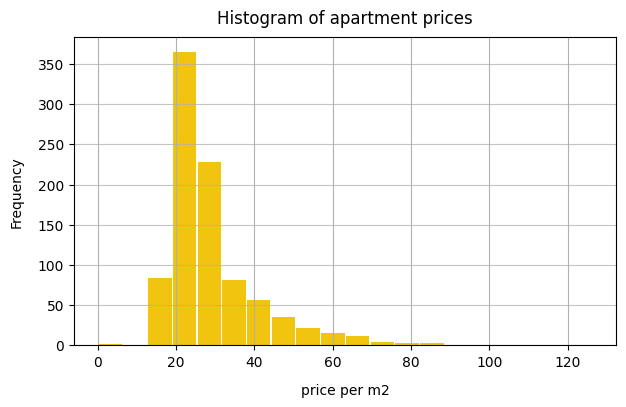

In [6]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#F1C40F',
                            alpha=1, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price per m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of apartment prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.3.0
Datetime: 2024-03-12 18:07:15
Python Version: 3.10.13
-----------------------------------
